# Author : Ghada Kamel El-Monayer


# Email: ghadakamel92@gmail.com

# Linear Regression with Python Scikit Learn
In this section we will use Python Scikit-Learn library for machine learning which can be used to implement regression functions. We start with simple linear regression involving two variables.



###### Simple Linear Regression

In this task we will predict the percentage of a students based on the number of study hours. This is a simple linear regression task as it involves just two variables.bold text

In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score, mean_absolute_error, mean_squared_error

### load and read data 

In [2]:
# load and read data 
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#check null data
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#check duplicates
df.duplicated().sum()

0

In [22]:
#decribe data and statastics 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
#corealtion between numbers of hours and score
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Visualization

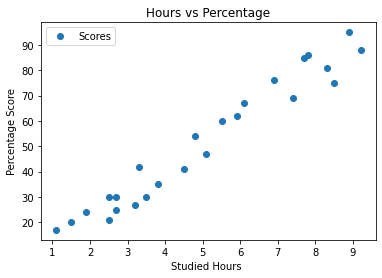

In [25]:
#plot the distrubtion of scores
df.plot(x = "Hours",y = "Scores",style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel("Studied Hours ")
plt.ylabel("Percentage Score")
plt.show()

C:\Users\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

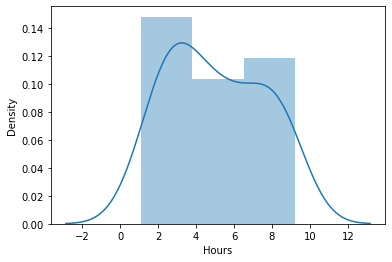

In [7]:
sns.distplot(df['Hours'])

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

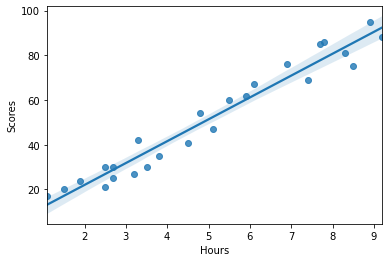

In [8]:
#regplot with a regression line
sns.regplot(x = 'Hours',y = "Scores",data = df)

# Data perparation 


In [26]:
#divide data into train and target
df_train = df.iloc[:, :-1].values
print(df_train)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
df_target = df.iloc[:, 1].values
print(df_target)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Model Training

In [11]:
# we will split data into training and test sets.using Scikit-Learn's built-in train_test_split() method:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size=0.2, random_state=0)

### Model : Linear Regression

In [12]:
model1 = LinearRegression()

In [13]:
model1.fit(X_train,y_train)

LinearRegression()

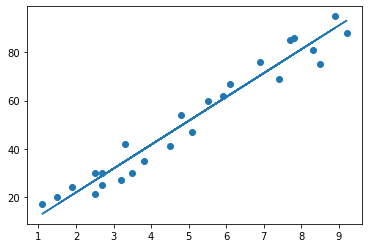

In [14]:
#plot regression line
line  = model1.coef_ * df_train + model1.intercept_
# plot test data
plt.scatter(df_train, df_target)
plt.plot(df_train, line)
plt.show()

In [15]:
#model prediction
Y_pred =  model1.predict(X_test)


In [16]:
# Comparing between Actual vs Predicted data
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})  
df_predicted.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



 ### Evaluate model Error 

In [29]:
#model Evaluation 
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))
print('Root Square Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))


Mean Absolute Error: 4.183859899002975
Root Square Error: 4.6474476121003665


In [30]:
print('R2_Score:', r2_score(y_test, Y_pred))

R2_Score: 0.9454906892105356


### Predict with our own data


In [31]:
# test with our own data
hours = 9.25
hours = np.asarray(hours).reshape(1,-1)
own_pred = model1.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
